# Binary classification

Can Pocketgrad do binary classfication?

### Obligatory components:
1. `Training data`: Input data with corresponding **binary labels (0/1)**
1. `Loss function`: **Binary Cross-Entropy loss function (Log loss)**
2. `Output layer`: **1 neuron**/ **2 neurons (one-hot encoding)**, sigmoid activation function
3. `Optimization algorithm`: SGD

In [1]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import seaborn as sns

import graphvisualizer.graph_visualizer as gv 

### Prepare training data with binary labels

In [2]:
X, y = make_moons(n_samples=1500, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle=True)

In [3]:
# df = pd.DataFrame(dict(x=X_train[:,0], y = X_train[:,1], label = y_train))
df = pd.DataFrame(dict(x=X[:,0], y = X[:,1], label = y))
df.head()

,x,y,label
0,1.970819,0.279990,1
1,1.837560,-0.077679,1
2,1.280914,-0.513296,1
3,1.975143,0.468409,1
4,-0.500934,0.628869,0


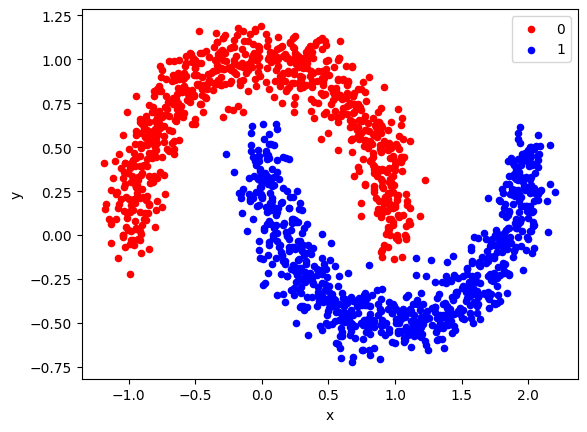

In [4]:
# Visualize binary classification task
colors = {0: 'red', 1: 'blue'}
grouped = df.groupby('label')

fig, ax = plt.subplots()
for key, group in grouped:
    group.plot(ax = ax, kind = 'scatter', x = 'x', y = 'y', label = key, color = colors[key])
plt.show()

### Importing pocketgrad

In [5]:
from pocketgrad.engine import Value 
from pocketgrad.nn import Neuron, Layer, MLP 

In [6]:
# Build the neural network
ROW, COL = X.shape
model = MLP(COL, [8,8,1])
model.layers[-1].neurons[-1].nonlin = 'sigmoid'# Change the last layer neuron to be relu
model

MLP of [Layer of [ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2)], Layer of [ReLUNeuron(8), ReLUNeuron(8), ReLUNeuron(8), ReLUNeuron(8), ReLUNeuron(8), ReLUNeuron(8), ReLUNeuron(8), ReLUNeuron(8)], Layer of [SigmoidNeuron(8)]]

$$
\begin{align}
&\text{Logistic regression}\\
&L = y \ln(\hat{p}) + (1-y) \ln(1 - \hat{p})\\
&\text{where }\hat{p} = \frac{1}{1 + e^{-z}}\\
&\text{is the logistic function}
\end{align}
$$

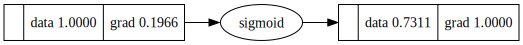

In [7]:
# Simple demonstration of the sigmoid activation function for the last layer
t = Value(1.0)
test1 = t.sigmoid()
test1.backward()
gv.draw_dot(test1)

In [8]:
# ypred = [model(x) for x in X_train]
ypred = [model(x) for x in X]
print(max(h.data for h in ypred))
print(min(h.data for h in ypred))
# test = sum((-y * y_pred.ln()) - ((1 - y)*(1-y_pred).ln()) for y, y_pred in zip(y_train[:5], ypred[:5]))
# test.backward()
# gv.draw_dot(test)

0.7050494988779702
0.28518396110124217


In [9]:
# loss = sum([bc_entropy_loss(y, logistic_func(yp.data)) for y, yp in zip(y_train, ypred)])
# loss.backward()

In [10]:
def gradient_descent(epoch):
    ypred = 0
    for e in range(epoch):
        # ypred = [model(x) for x in X_train]
        # ypred = [Value(1) if model(x).data > 0.7 else model(x) for x in X_train]
        ypred = [Value(1) if model(x).data > 0.7 else model(x) for x in X]
        # ypred = [Value(1) if model(x).data > 0.7 else Value(0) for x in X_train]
        # Forward
        
        # loss = ((-1)/len(ypred)) * sum(((y) * y_pred.ln()) + ((1 - y)*(1-y_pred).ln()) for y, y_pred in zip(y_train, ypred))
        loss = 0
        for yt, y_pred in zip(y, ypred):
            t1 = y_pred.ln()
            t2 = (1-y_pred).ln()
            loss += (yt * t1) + (1 - yt) * t2
       
        loss = ((-1)/len(ypred)) * loss
        # Backward
        loss.backward()
        
        # Update
        for p in model.parameters():
            p.data -= 0.1 * p.grad
        
        # Zero grad
        model.zero_grad()
        
        print(f'epoch: {e} | loss: {loss}')
    

In [11]:
gradient_descent(50)

epoch: 0 | loss: Value(data=0.6464973417959978, grad=1)
epoch: 1 | loss: Value(data=0.5990265201478516, grad=1)
epoch: 2 | loss: Value(data=0.5655743710104681, grad=1)
epoch: 3 | loss: Value(data=0.5362667020127007, grad=1)
epoch: 4 | loss: Value(data=0.510872777036338, grad=1)
epoch: 5 | loss: Value(data=0.48864139548009733, grad=1)
epoch: 6 | loss: Value(data=0.46752007546634905, grad=1)
epoch: 7 | loss: Value(data=0.4527681700656138, grad=1)
epoch: 8 | loss: Value(data=0.43609271839981206, grad=1)
epoch: 9 | loss: Value(data=0.4237500952018739, grad=1)
epoch: 10 | loss: Value(data=0.4105503119630547, grad=1)
epoch: 11 | loss: Value(data=0.3984734992129028, grad=1)
epoch: 12 | loss: Value(data=0.3886302314349094, grad=1)
epoch: 13 | loss: Value(data=0.3804530340838665, grad=1)
epoch: 14 | loss: Value(data=0.37333381164666457, grad=1)
epoch: 15 | loss: Value(data=0.36603815172366233, grad=1)
epoch: 16 | loss: Value(data=0.35920801324755863, grad=1)
epoch: 17 | loss: Value(data=0.35301

In [12]:
X, Y = np.mgrid[-2:3:100j,-1:2:100j]
X = X.flatten()
Y = Y.flatten()

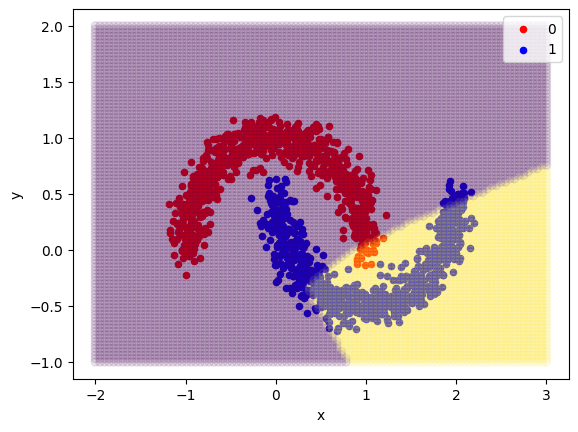

In [13]:
# Visualize decision boundary 
colors = {0: 'red', 1: 'blue'}
grouped = df.groupby('label')

fig, ax = plt.subplots()
prediction = [1 if model([x,y]).data > 0.7 else 0 for x, y in zip(X,Y)]
for key, group in grouped:
    group.plot(ax = ax, kind = 'scatter', x = 'x', y = 'y', label = key, color = colors[key])

ax.scatter(X, Y, alpha = 0.1, c = prediction)
plt.show()